In [1]:
import sys

sys.path.append("..")

In [2]:
# create agent and environment

from qurious.rl.environments import GridWorld

# Create a 10x10 maze with a guaranteed path
env = GridWorld(
    width=10,
    height=10,
    obstacles=0.2,
    terminal_reward=0.0,
    step_penalty=0.1,
    max_steps=200,
)

# Render the maze
print(env.render())

A . . . . . # . . .
. # # # # . . . . .
. . . # # . . . # #
# . . # . . . . . .
. . . . . . . # . #
. . . . . . . . . .
. . . . . . . . . .
. . . . . . . . . .
. . . . . # . . . .
# . . . . . # # . G



In [6]:
from qurious.rl.agents import SarsaAgent
from qurious.rl.utils import train_agent

# Create agent
agent = SarsaAgent.from_env(env, gamma=0.99)

train_agent(env, agent, num_episodes=1000)

↓ → → → → ↓ # ← ← ↑
↓ # # # # → ↓ ↓ ↓ ↓
→ → ↓ # # ← → ↓ # #
# ↓ ↓ # ↑ → ↓ → ↓ ↓
← → → → → ↓ ↓ # ↓ #
→ → → ↓ → ↓ → → → ↓
← → → ↓ ↓ → ↓ → ↓ ↓
↑ → → → → → → ↓ → ↓
↓ → ↑ ↑ → # → → → ↓
# ↓ ↑ ↑ ↓ → # # → A



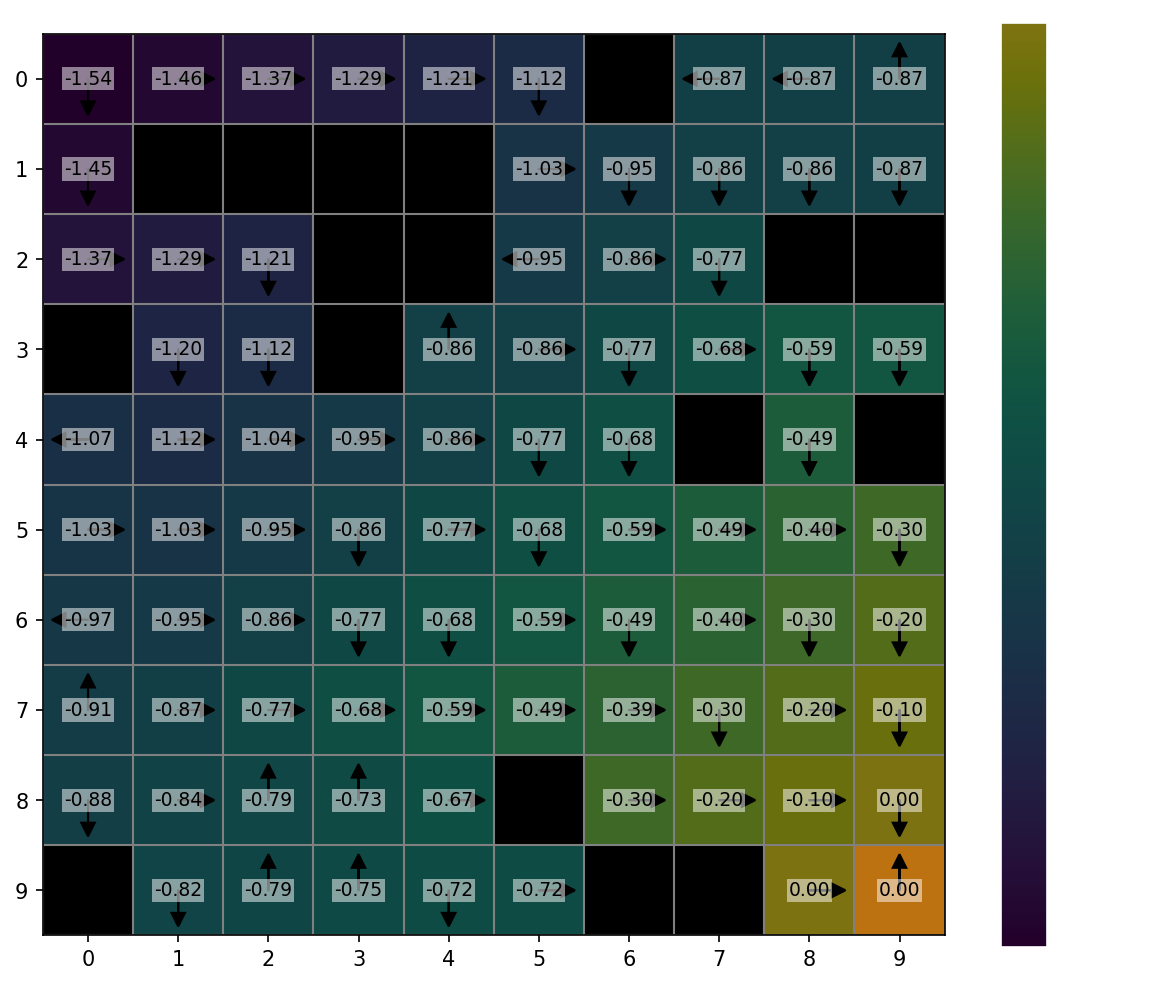

In [8]:
from qurious.visualization import (
    AgentLayer,
    GridLayer,
    GridWorldVisualizer,
    PolicyLayer,
    StateValueLayer,
)

# Create visualizer
viz = GridWorldVisualizer(env)
viz.add_layer(GridLayer())
viz.add_layer(AgentLayer())
viz.add_layer(StateValueLayer(agent.Q))
# viz.add_layer(ActionValueLayer(agent.Q))
viz.add_layer(PolicyLayer(agent.policy.base_policy, arrow_color="black"))


viz.render_matplotlib(figsize=(8, 8))
print(viz.render_ascii())

In [12]:
from time import sleep

from qurious.rl.utils import run_agent
from qurious.visualization import clear_output


def step_callback(*args, **kwargs):
    clear_output()
    print(viz.render_ascii())
    sleep(0.2)


run_agent(env, agent, num_episodes=1, step_callback=step_callback)

↓ → → → → ↓ # ← ← ↑
↓ # # # # → ↓ ↓ ↓ ↓
→ → ↓ # # ← → ↓ # #
# ↓ ↓ # ↑ → ↓ → ↓ ↓
← → → → → ↓ ↓ # ↓ #
→ → → ↓ → ↓ → → → ↓
← → → ↓ ↓ → ↓ → ↓ ↓
↑ → → → → → → ↓ → ↓
↓ → ↑ ↑ → # → → → ↓
# ↓ ↑ ↑ ↓ → # # → A

